# Make Libraries and The Dataset Itself

pertama - pertama lakukan adalah buka dataset dan semua libraries yang dirasa perlu.
libraries digunakan adalah
1.   `pandas` untuk pembuatan `DataFrame` dan manipulasi data
2.   `math` untuk melakukan operasi penghitungan matematika



In [18]:
!pip install imblearn 
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [19]:
url = "https://raw.githubusercontent.com/ikhwankusuma/datasetdataminingalp/main/DatasetALP.csv"

df = pd.read_csv(url)
df.head()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0


# Ubah Nama Columns

ubah nama setiap kolom agar memudahkan kita:

-  `gender` -> `gender`
-   `age` -> `age`
-   `Time` -> `time`
-   `Number_of_Warts` -> `warts_count`
-   `Type` -> `type`
-   `Area` -> `area`
-   `induration_diameter` -> `induration_diameter`
-   `Result_of_Treatment` -> `treatment_result`



In [20]:
df.rename(columns = { 'gender': 'gender', 'age': 'umur', 'Time': 'waktu', 'Number_of_Warts': 'warts', 'Type': 'type', 'Area': 'area', 'induration_diameter': 'induration', 'Result_of_Treatment': 'result_treatment' }, inplace = True)

df.head()

,gender,umur,waktu,warts,type,area,induration,result_treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0


# Dealing with Missing Values

dataset tidak boleh memiliki nilai yang hilang atau `null` pada setiap barisnya agar mempermudah proses Clustering.

berikut cara untuk mendeteksi missing values:

- Menghapus kolom yang memiliki nilai `null` atau kosong
- Menghapus baris yang memiliki nilai `null` atau kosong
- Mengisi nilai hilang dengan `mode` / modus jika tipe data merupakan *categorical*
- Mengisi nilai hilang dengan `mean` / rata-rata jika tipe data merupakan *numerical*
- Menggunakan *classification* / klasifikasi jika tipe data merupakan *categorical*
- Menggunakan *regression* / regresi jika tipe data merupakan *numerical*



# Pengecekan Missing Values
Sebelum melakukan Pengecekan *missing values*, hal yang harus yaitu adalah menghapus baris yang duplikat dari dataset lalu kemudian cari tahu apa betul masih ada nilai yang hilang dari dataset tersebut.

In [21]:
df[df.duplicated()]

,gender,umur,waktu,warts,type,area,induration,result_treatment


tidak didapati adanya baris yang duplikat.

In [22]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            90 non-null     float64
 1   umur              90 non-null     float64
 2   waktu             87 non-null     float64
 3   warts             89 non-null     float64
 4   type              85 non-null     float64
 5   area              90 non-null     float64
 6   induration        88 non-null     float64
 7   result_treatment  90 non-null     float64
dtypes: float64(8)
memory usage: 5.8 KB


In [23]:
print(df.isnull().sum())

gender              0
umur                0
waktu               3
warts               1
type                5
area                0
induration          2
result_treatment    0
dtype: int64


hasil diatas dapat diketahui bahwa masih ada *missing values* pada kolom `waktu`, `warts`, `type` dan `induration`.

Untuk memperbaiki *missing values* yang terdapat pada kolom tersebut adalah:


*   `waktu`: Diisi dengan `mean` atau rata-rata dari dataset
*   `induration`: Diisi dengan `mean` atau rata-rata dari dataset
*   `warts`: Menggunakan *regression*
*   `type`: Menggunakan *classification*



# Filling `time` and `induration_diameter` With Mean

Untuk mengisi `row` yang bernilai `null` atau kosong, dapat dilakukan dengan menggunakan method bernama `fillna()` dan menambahkan property `inplace = True` agar nilai pada dataset terubah.

In [24]:
df["waktu"].fillna(math.floor(df["waktu"].mean()), inplace = True)
df["induration"].fillna(math.floor(df["induration"].mean()), inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            90 non-null     float64
 1   umur              90 non-null     float64
 2   waktu             90 non-null     float64
 3   warts             89 non-null     float64
 4   type              85 non-null     float64
 5   area              90 non-null     float64
 6   induration        90 non-null     float64
 7   result_treatment  90 non-null     float64
dtypes: float64(8)
memory usage: 5.8 KB


# Menggunakan Regression Untuk Mengisi `warts` Missing Values

Untuk mengisi missing values menggunakan metode Linearregression karena ini merupakan metode paling bagus dibanding menggunakan metode lainnya, dapat digunakan library `LinearRegression` dari `sklearn` untuk melakukan regresinya.

In [25]:


testdf = df[df['warts'].isnull() == True]
traindf = df[df['warts'].isnull() == False]

y = traindf['warts']
traindf.drop("warts", axis = 1, inplace = True)
traindf.drop("type", axis = 1, inplace = True)
testdf.drop("warts", axis = 1, inplace = True)
testdf.drop("type", axis = 1, inplace = True)

lr = LinearRegression()
lr.fit(traindf,y)

pred = lr.predict(testdf)

testdf['warts'] = pred
traindf['warts'] = y

df2 = testdf.append(traindf)
df2["type"] = df["type"]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 89
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            90 non-null     float64
 1   umur              90 non-null     float64
 2   waktu             90 non-null     float64
 3   area              90 non-null     float64
 4   induration        90 non-null     float64
 5   result_treatment  90 non-null     float64
 6   warts             90 non-null     float64
 7   type              85 non-null     float64
dtypes: float64(8)
memory usage: 6.3 KB


C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-25-a824983b716b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['warts'] = pred
<ipython-input-25-a824983b716b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr

# Menggunakan Classification Untuk Mengisi `type` Missing Values

Untuk melakukan klasifikasi, metode yang digunakan adalah metode `naive bayes` yang dapat dipakai melalui library `GaussianNB` dari `sklearn`.

In [26]:
nb = GaussianNB()

testdf = df2[df2['type'].isnull() == True]
traindf = df2[df2['type'].isnull() == False]

y = traindf['type']
traindf.drop("type", axis = 1, inplace = True)
testdf.drop("type", axis = 1, inplace = True)

nb.fit(traindf, y)
pred = nb.predict(testdf)

testdf['type'] = pred
traindf['type'] = y

df3 = testdf.append(traindf)
df3.info()

df = df3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 10 to 88
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            90 non-null     float64
 1   umur              90 non-null     float64
 2   waktu             90 non-null     float64
 3   area              90 non-null     float64
 4   induration        90 non-null     float64
 5   result_treatment  90 non-null     float64
 6   warts             90 non-null     float64
 7   type              90 non-null     float64
dtypes: float64(8)
memory usage: 6.3 KB


C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-26-c0884abd369b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['type'] = pred
<ipython-input-26-c0884abd369b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tra

# Dealing With Imbalanced Datas

Sebelum melakukan normalisasi, harus melakukan check apakah ada data yang tidak imbang. Hal tersebut bisa dilakukan dengan cara melihat jumlah dari setiap value yang ada pada target atributnya, yang dimaksud adalah `treatment_result`.

In [27]:
df['result_treatment'].value_counts()

1.0    71
0.0    19
Name: result_treatment, dtype: int64

hasil diatas menghasilkan bahwa data yang bernilai 1 dan 0 memiliki selisih yang cukup jauh, jika tidak diseimbangkan maka dapat terjadi data yang bias, dan hal tersebut akan berpengaruh buruk untuk analisis data.

Untuk mengatasi data yang tidak seimbang, dapat digunakan metode *Synthetic Minority Oversampling Technique* (SMOTE) untuk menyeimbangkan dataset tersebut.

In [28]:
y = df['result_treatment']
x = df
x.drop(columns = ['result_treatment'], inplace = True)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

sm = SMOTE(random_state = 42)
xRus, yRus = sm.fit_resample(xTrain, yTrain)

xRus['result_treatment'] = yRus

df = xRus
df['result_treatment'].value_counts()

0.0    47
1.0    47
Name: result_treatment, dtype: int64

# Normalization

Setelah mengisi setiap missing values selanjutnya sebelum melakukan clustering adalah melakukan normalisasi supaya tidak terjadi pembiasan data yang signifikan.

In [29]:
df.describe()

,gender,umur,waktu,area,induration,warts,type,result_treatment
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,1.526538,31.005180,7.790815,81.514993,13.698305,5.911137,1.666183,0.500000
std,0.457348,10.990681,3.082447,102.147910,14.867442,3.478350,0.763962,0.502681
min,1.000000,15.000000,1.000000,6.000000,2.000000,1.000000,1.000000,0.000000
25%,1.000000,21.722543,5.562500,35.522578,5.672680,3.000000,1.000000,0.000000
50%,1.577226,29.156010,8.125000,48.045452,7.000000,6.000000,1.036671,0.500000
75%,2.000000,40.039528,10.573594,68.850492,15.371155,7.824683,2.011975,1.000000
max,2.000000,54.000000,12.000000,507.000000,70.000000,18.000000,3.000000,1.000000


hasil  diatas menghasilkan bahwa terdapat bentang nilai yang sangat jauh dengan nilai terkecil -2.96 pada kolom `warts` dan nilai terbesar 507 di kolom `area` hal tersebut dapat berimbas pada pembiasan data yang berarti kolom `area` akan memiliki pengaruh yang jauh lebih kuat dikarenakan memiliki rentang nilai terjauh.

In [30]:
for (name, data) in df.iteritems():
  max = df[name].max()
  pow = len(str(abs(max))) -2
  for (index, val) in df.iterrows():
    
    
    df[name][index] = df[name][index] / 10 ** pow
df.describe()

,gender,umur,waktu,area,induration,warts,type,result_treatment
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.152654,0.310052,0.077908,0.081515,0.136983,0.059111,0.166618,0.050000
std,0.045735,0.109907,0.030824,0.102148,0.148674,0.034784,0.076396,0.050268
min,0.100000,0.150000,0.010000,0.006000,0.020000,0.010000,0.100000,0.000000
25%,0.100000,0.217225,0.055625,0.035523,0.056727,0.030000,0.100000,0.000000
50%,0.157723,0.291560,0.081250,0.048045,0.070000,0.060000,0.103667,0.050000
75%,0.200000,0.400395,0.105736,0.068850,0.153712,0.078247,0.201197,0.100000
max,0.200000,0.540000,0.120000,0.507000,0.700000,0.180000,0.300000,0.100000


# Clustering

step selanjutnya setelah normalisasi data yaitu melakukan pengelompokkan data menggunakan metode K-Means.

step pertama melakukan mencari jumlah kelompok yang paling optimal menggunakan metode *elbow*.

In [31]:
result = []
crange = range(1, 15)
for k in crange:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    result.append(km.inertia_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

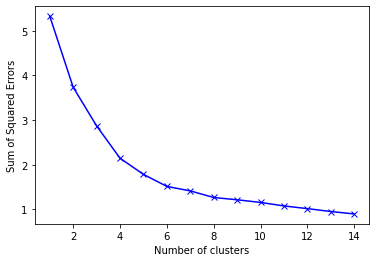

In [32]:
plt.plot(crange, result, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.show()

In [33]:
kl = KneeLocator(crange, result, curve="convex", direction="decreasing")
kl.elbow

5

hasil diatas menghasilkan jumlah kelompok yang paling optimal adalah sebanyak 4 kelompok. lalu baru dilakukan proses pengelompokkan dengan metode K-Means dengan menggunakan library `KMeans` dari `sklearn`.

In [34]:
kmeans = KMeans(n_clusters = kl.elbow, init = "k-means++").fit(df)

labels = kmeans.fit_predict(df)
df['category'] = labels
df['category'].value_counts()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2    39
1    26
0    14
3     8
4     7
Name: category, dtype: int64

Hasil dari pengelompokkan dilakukan terdapat 4 kelompok yang dimana masing-masing kelompok memiliki jumlah data:

- kelompok 0: 33 data
- kelompok 1: 23 data
- kelompok 2: 24 data
- kelompok 3: 14 data